In [110]:
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\Pranav m\Downloads\Copy1_Capstone_dataset.xlsx")


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123833 entries, 0 to 123832
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Datecoll               123833 non-null  datetime64[ns]
 1   Name_Patie             123325 non-null  object        
 2   Head_Family            112874 non-null  object        
 3   Age (years)            122490 non-null  float64       
 4   Age_Month              122490 non-null  object        
 5   Sex                    123833 non-null  object        
 6   Malaria Results        123833 non-null  object        
 7   Malaria Results (RDT)  688 non-null     object        
 8   Species                7084 non-null    object        
 9   Stage                  6396 non-null    object        
 10  His_Fev (No. of Days)  118958 non-null  object        
 11  Malt_Type              7087 non-null    object        
 12  Address                120695 non-null  obje

Initial Visualizations without splitting P and N cases

In [112]:
df['Malaria Results'] = df['Malaria Results'].str.upper()
df['Species'] = df['Species'].str.upper()
df['Malaria Results (RDT)'] = df['Malaria Results (RDT)'].str.upper()
df['Stage'] = df['Stage'].str.upper()
df['Malt_Type'] = df['Malt_Type'].str.upper()

In [113]:
# Convert all string columns to uppercase
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.upper()

print("Columns converted to uppercase:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Columns converted to uppercase:
Name_Patie: ['GAMBHIR' 'JAYANTI' 'SUNIL' ... 'MONKU' 'BAIJAI' 'BIDHRAM']
Head_Family: ['SOMARUTELAM' 'DIGNATH KASHYAP' 'GURBANDHU' ... 'BUDARA' 'KHUTHURAM'
 'NANDHAL']
Age_Month: [nan '0' '5 DAY' '1 DAY' '12DAY']
Sex: ['M' 'F' 'TRANSGENDER']
Malaria Results: ['N' 'P']
Malaria Results (RDT): [nan 'RDT PF' 'RDT PV' 'RDT PF PV' 'RDT PAN' 'RDT PF PAN']
Species: [nan 'PF' 'PV' 'PF+PV' 'PF+PO' 'PAN' 'PF PAN ' 'PF+PM' 'PO' 'PF PAN']
Stage: [nan 'ASEXUAL' 'BOTH' 'SEXUAL']
His_Fev (No. of Days): [nan '0' 'NIGHT']
Malt_Type: [nan 'CM' 'SM' 'UM' ' ']
Address: ['DHARAMPURA' 'AASNA' 'KALIMANDIR' ... 'SUHBADA' 'DANGER' 'DHURUGAON']
District: ['JAGDALPUR' 'DURG' 'BALOD' 'SUKMA' 'BIJAPUR' 'KANKER' 'DANTEWADA'
 'RAIPUR' 'KONDAGAON' nan 'NARAYANPUR' 'NA ' 'RAIGARH' 'BILASPUR'
 'RAJNANDGAON' 'BALAGHAT' 'KORIYA' 'SARGUJA' 'BHANPURI' 'DHAMTRI'
 'BEMETARA']
Outcome: ['DISCHARGE' 'DEATH' 'NOT ADMITTED']


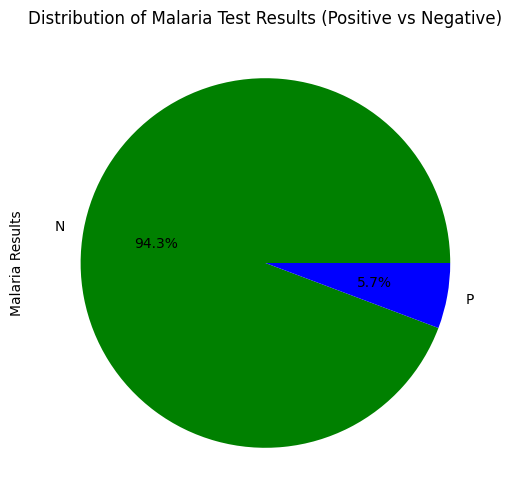

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Testing Results Distribution
plt.figure(figsize=(10, 6))
df['Malaria Results'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',
    colors=['green', 'blue']
)
plt.title('Distribution of Malaria Test Results (Positive vs Negative)')
plt.show()


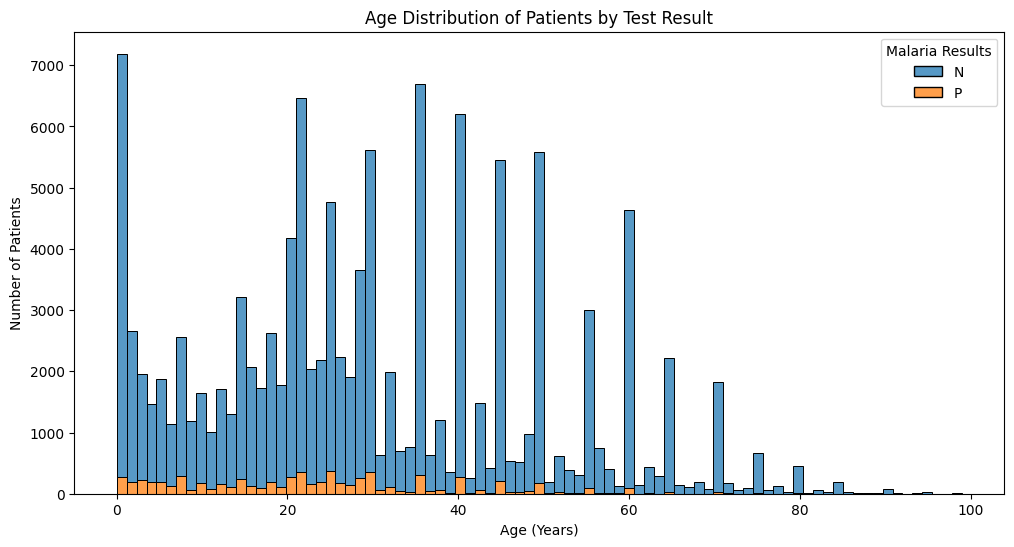

<Figure size 1200x600 with 0 Axes>

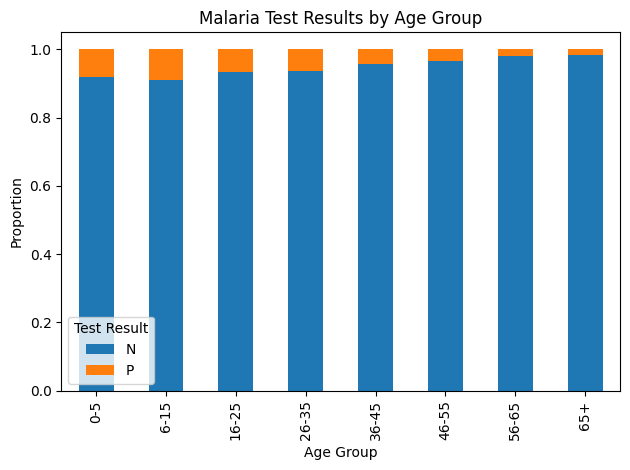

In [115]:

# Age Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age (years)', hue='Malaria Results', multiple="stack")
plt.title('Age Distribution of Patients by Test Result')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.show()

# Age group analysis
df['Age_Group'] = pd.cut(df['Age (years)'], 
                        bins=[0, 5, 15, 25, 35, 45, 55, 65, 100],
                        labels=['0-5', '6-15', '16-25', '26-35', '36-45', '46-55', '56-65', '65+'])

plt.figure(figsize=(12, 6))
pd.crosstab(df['Age_Group'], df['Malaria Results'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Malaria Test Results by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Test Result')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

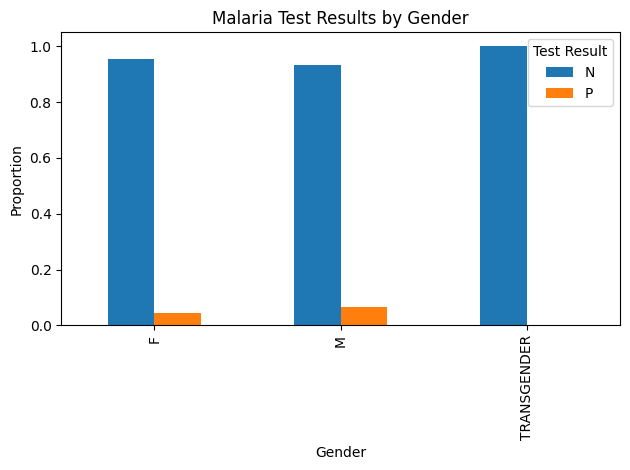

In [116]:

# Gender Analysis
plt.figure(figsize=(10, 6))
pd.crosstab(df['Sex'], df['Malaria Results'], normalize='index').plot(kind='bar')
plt.title('Malaria Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Test Result')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

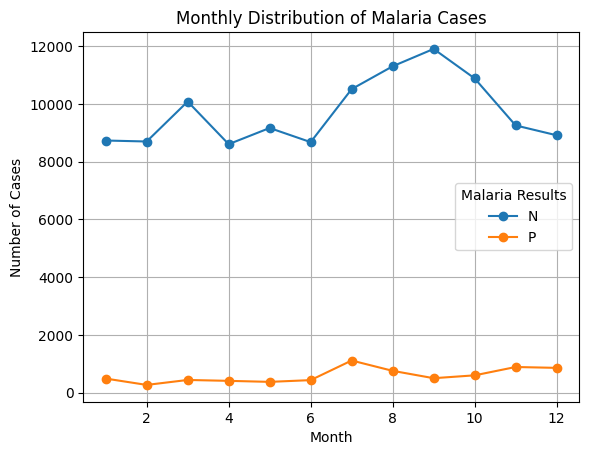

In [117]:

# Temporal Analysis
df['Month'] = pd.to_datetime(df['Datecoll']).dt.month
df['Year'] = pd.to_datetime(df['Datecoll']).dt.year

# Monthly trends
plt.figure(figsize=(12, 6))
monthly_cases = pd.crosstab(df['Month'], df['Malaria Results'])
monthly_cases.plot(kind='line', marker='o')
plt.title('Monthly Distribution of Malaria Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

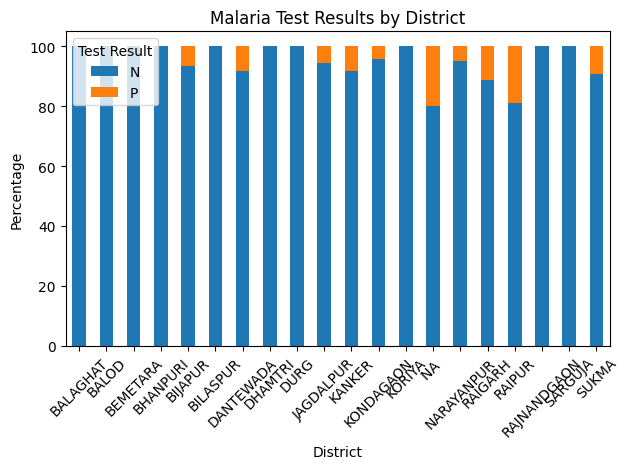

In [118]:

# Geographic Distribution
plt.figure(figsize=(12, 6))
district_cases = pd.crosstab(df['District'], df['Malaria Results'], normalize='index') * 100
district_cases.plot(kind='bar', stacked=True)
plt.title('Malaria Test Results by District')
plt.xlabel('District')
plt.ylabel('Percentage')
plt.legend(title='Test Result')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:

# Summary Statistics
print("\nKey Statistics:")
print("\nTotal number of patients tested:", len(df))
print("Positive cases:", len(df[df['Malaria Results'] == 'P']))
print("Negative cases:", len(df[df['Malaria Results'] == 'N']))

print("\nAge Statistics:")
print(df.groupby('Malaria Results')['Age (years)'].describe())



Key Statistics:

Total number of patients tested: 123833
Positive cases: 7084
Negative cases: 116749

Age Statistics:
                    count       mean        std  min   25%   50%   75%   max
Malaria Results                                                             
N                115422.0  30.420146  19.298023  0.0  17.0  28.0  45.0  99.0
P                  7068.0  23.677632  15.867227  0.0  11.0  23.0  32.0  95.0


In [120]:

# Risk Analysis
#  positivity rate by age group
age_risk = pd.crosstab(df['Age_Group'], df['Malaria Results'], normalize='index') * 100
print("\nPositivity Rate by Age Group (%):")
print(age_risk['P'])

# positivity rate by gender
gender_risk = pd.crosstab(df['Sex'], df['Malaria Results'], normalize='index') * 100
print("\nPositivity Rate by Gender (%):")
print(gender_risk['P'])




Positivity Rate by Age Group (%):
Age_Group
0-5      8.206636
6-15     9.027576
16-25    6.754572
26-35    6.296360
36-45    4.348082
46-55    3.393478
56-65    1.934623
65+      1.628011
Name: P, dtype: float64

Positivity Rate by Gender (%):
Sex
F              4.581975
M              6.532142
TRANSGENDER    0.000000
Name: P, dtype: float64


In [121]:
#District-wise Analysis
district_stats = pd.crosstab(df['District'], df['Malaria Results'])
district_stats['Positivity_Rate'] = (district_stats['P'] / (district_stats['P'] + district_stats['N'])) * 100
print("\nDistrict-wise Statistics:")
print(district_stats.sort_values('Positivity_Rate', ascending=False))



District-wise Statistics:
Malaria Results       N     P  Positivity_Rate
District                                      
NA                    4     1        20.000000
RAIPUR               17     4        19.047619
RAIGARH               8     1        11.111111
SUKMA               842    86         9.267241
DANTEWADA          1285   118         8.410549
KANKER               55     5         8.333333
BIJAPUR            1237    88         6.641509
JAGDALPUR        109660  6622         5.694776
NARAYANPUR          131     7         5.072464
KONDAGAON          3027   131         4.148195
BILASPUR              2     0         0.000000
DHAMTRI               3     0         0.000000
DURG                  8     0         0.000000
BALOD                 1     0         0.000000
KORIYA                1     0         0.000000
BHANPURI             11     0         0.000000
BEMETARA              1     0         0.000000
RAJNANDGAON           5     0         0.000000
SARGUJA               1     0    

Analysis for Positive cases only

Descriptive Statistics and Baseline Analysis

In [122]:
# separate positive and negative cases
df_positive = df[df['Malaria Results'] == 'P']
df_negative = df[df['Malaria Results'] == 'N']

print("Total number of cases:", len(df))
print("Number of positive cases:", len(df_positive))
print("Number of negative cases:", len(df_negative))


Total number of cases: 123833
Number of positive cases: 7084
Number of negative cases: 116749


In [123]:
# Analyze species distribution in positive cases
print("\nSpecies Distribution in Positive Cases:")
species_counts = df_positive['Species'].value_counts()
print("\nCounts:")
print(species_counts)

print("\nPercentages:")
species_percentages = df_positive['Species'].value_counts(normalize=True) * 100
print(species_percentages)



Species Distribution in Positive Cases:

Counts:
PF         6184
PV          858
PF+PV        35
PAN           2
PF+PO         1
PF PAN        1
PF+PM         1
PO            1
PF PAN        1
Name: Species, dtype: int64

Percentages:
PF         87.295313
PV         12.111801
PF+PV       0.494071
PAN         0.028233
PF+PO       0.014116
PF PAN      0.014116
PF+PM       0.014116
PO          0.014116
PF PAN      0.014116
Name: Species, dtype: float64


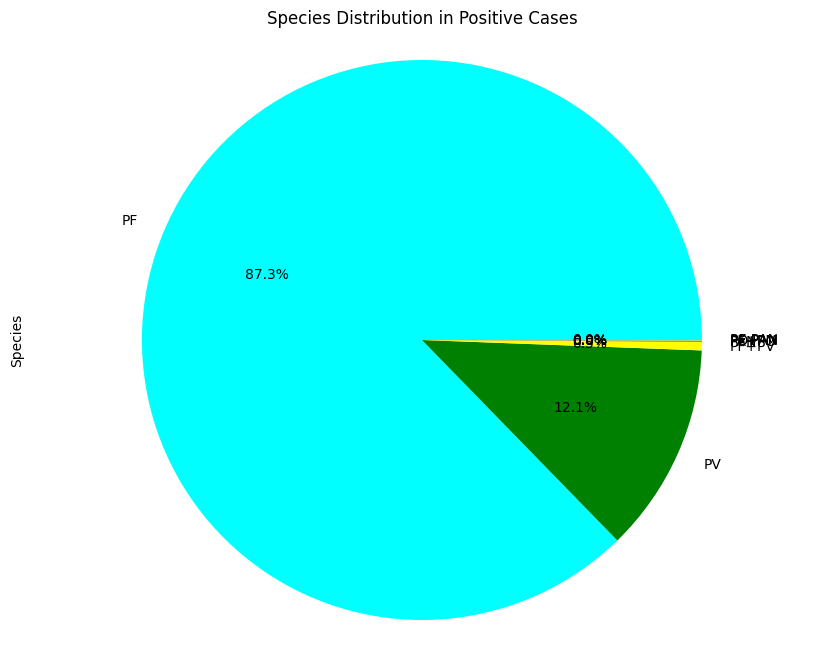

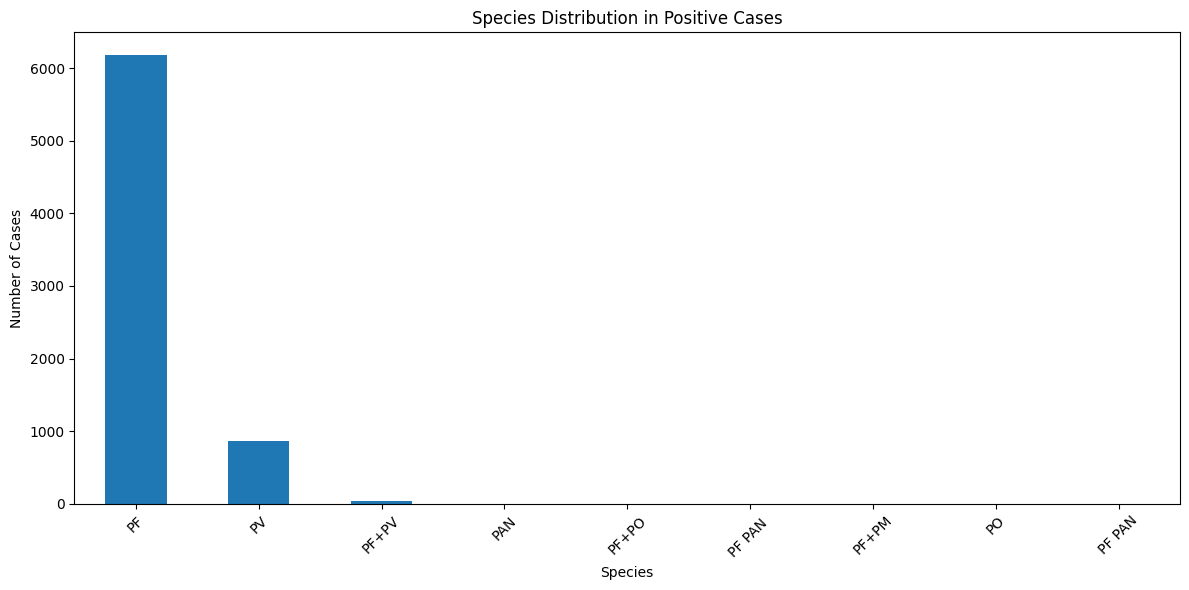

In [124]:
# Visualize species distribution in positive cases
plt.figure(figsize=(10, 8))
df_positive['Species'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%',
    colors=['cyan','green','yellow','brown', 'red', 'orange']
)
plt.title('Species Distribution in Positive Cases')
plt.axis('equal')
plt.show()

# Bar plot for absolute numbers
plt.figure(figsize=(12, 6))
df_positive['Species'].value_counts().plot(kind='bar')
plt.title('Species Distribution in Positive Cases')
plt.xlabel('Species')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total number of positive cases: 7084


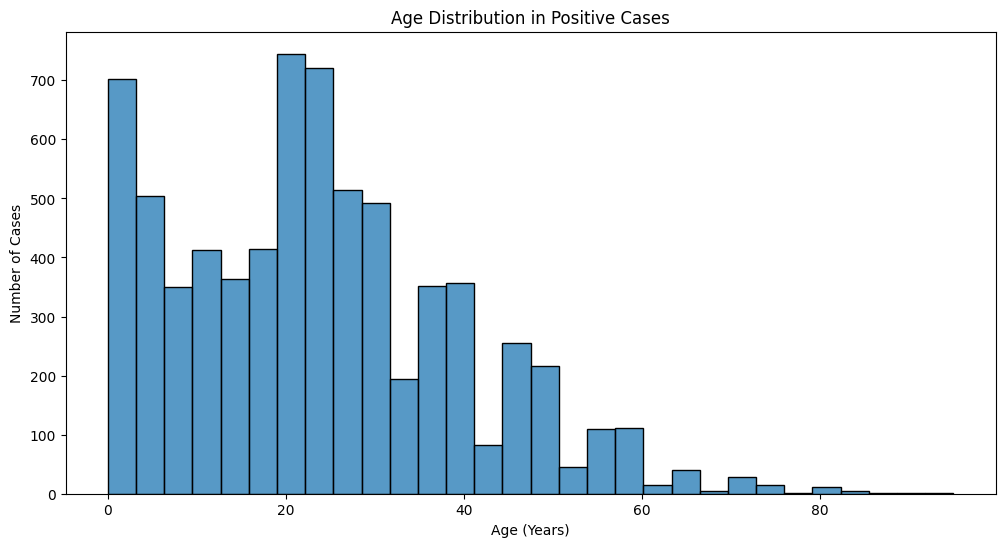

C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\3996223438.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Age_Group'] = pd.cut(df_positive['Age (years)'], bins=age_bins, labels=age_labels)


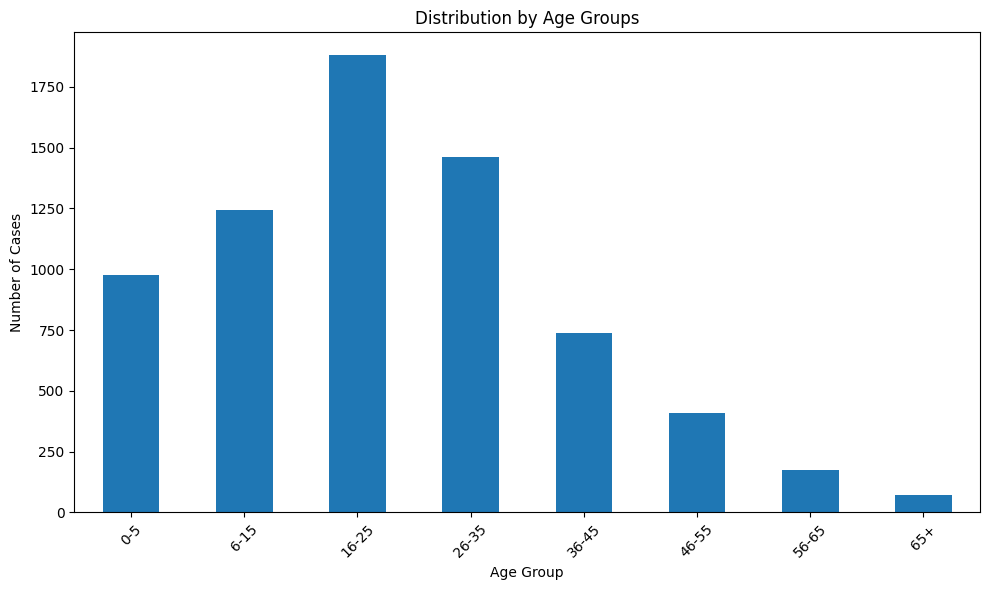

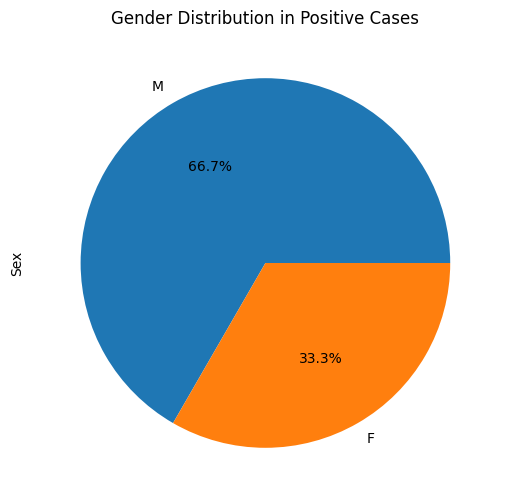

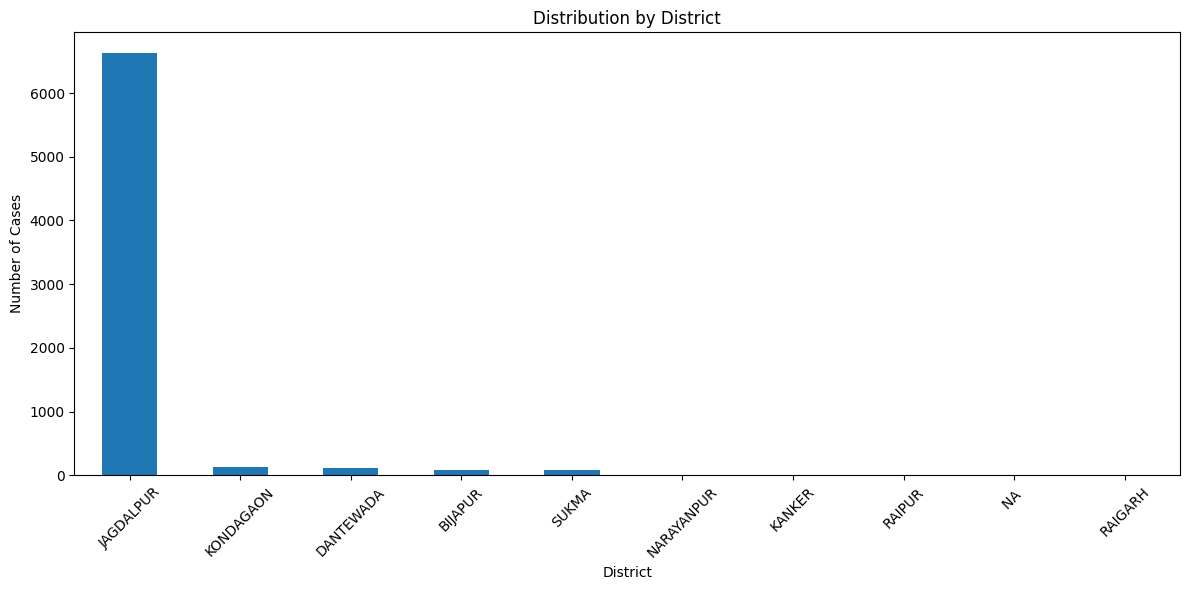

In [125]:
import seaborn as sns
import calendar

# DEMOGRAPHIC PROFILING
print("Total number of positive cases:", len(df_positive))

# Age Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df_positive, x='Age (years)', bins=30)
plt.title('Age Distribution in Positive Cases')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Cases')
plt.show()

# Age Group Analysis
age_bins = [0, 5, 15, 25, 35, 45, 55, 65, 100]
age_labels = ['0-5', '6-15', '16-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_positive['Age_Group'] = pd.cut(df_positive['Age (years)'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
df_positive['Age_Group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gender Distribution
plt.figure(figsize=(8, 6))
df_positive['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution in Positive Cases')
plt.show()

# District Distribution
plt.figure(figsize=(12, 6))
df_positive['District'].value_counts().plot(kind='bar')
plt.title('Distribution by District')
plt.xlabel('District')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\826548039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Datecoll'] = pd.to_datetime(df_positive['Datecoll'])
C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\826548039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Year'] = df_positive['Datecoll'].dt.year
C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\826548039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

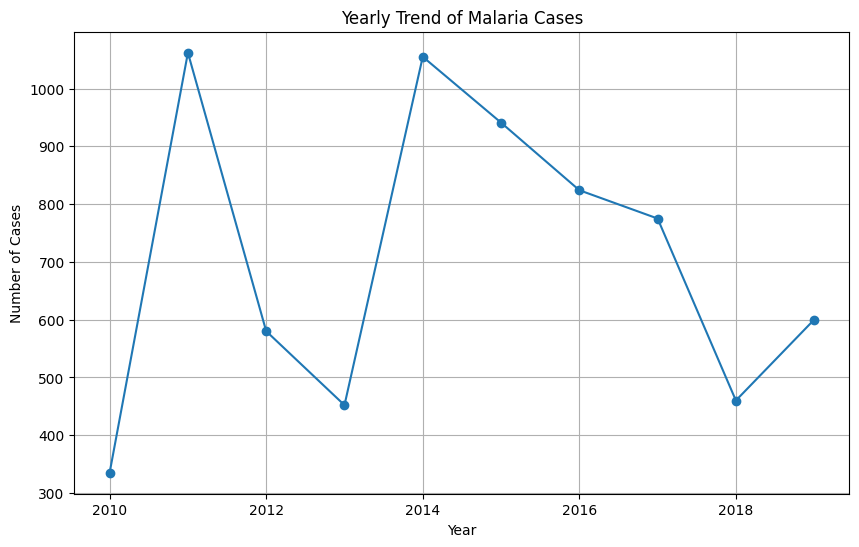

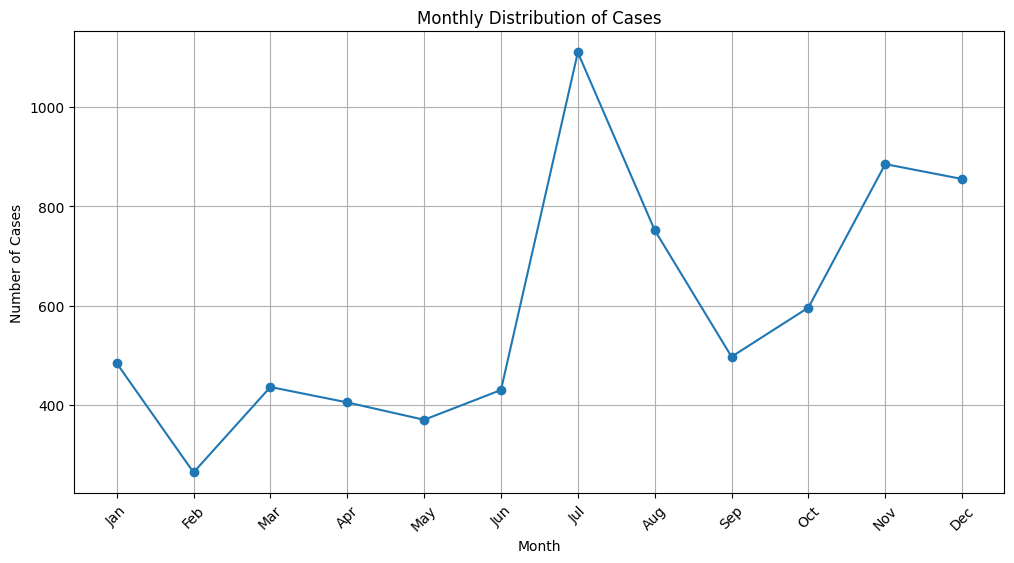

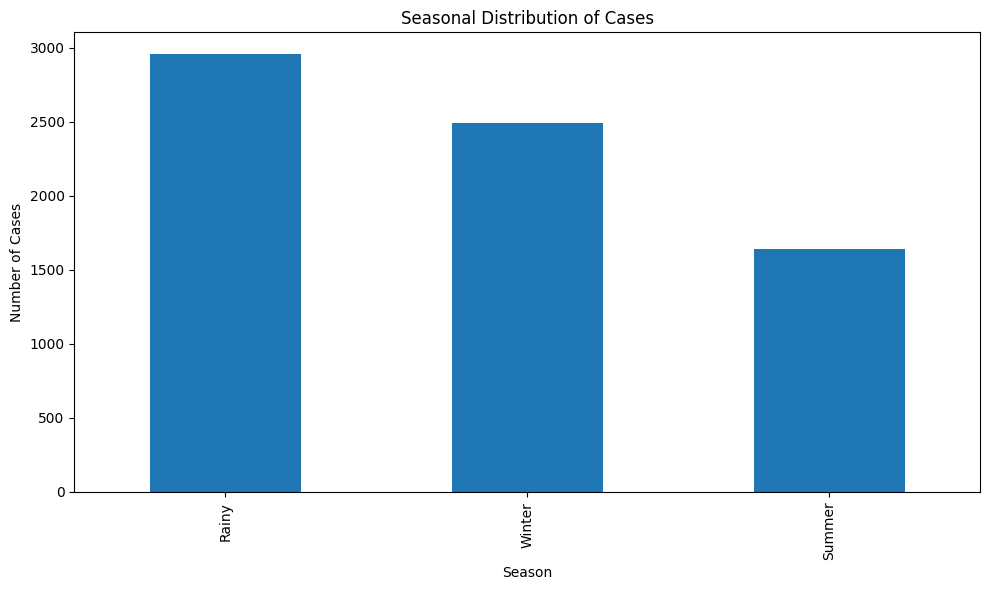

In [126]:
# TEMPORAL TRENDS
# Convert date column to datetime
df_positive['Datecoll'] = pd.to_datetime(df_positive['Datecoll'])
df_positive['Year'] = df_positive['Datecoll'].dt.year
df_positive['Month'] = df_positive['Datecoll'].dt.month

# Define seasons using the 3-season format
def get_season(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [7, 8, 9, 10]:
        return 'Rainy'
    elif month in [3, 4, 5, 6]:
        return 'Summer'

df_positive['Season'] = df_positive['Month'].apply(get_season)

# Yearly Trend
plt.figure(figsize=(10, 6))
df_positive['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Yearly Trend of Malaria Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

# Monthly Trend
monthly_cases = df_positive['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='line', marker='o')
plt.title('Monthly Distribution of Cases')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(range(1,13), calendar.month_abbr[1:], rotation=45)
plt.grid(True)
plt.show()

# Seasonal Distribution
plt.figure(figsize=(10, 6))
df_positive['Season'].value_counts().plot(kind='bar')
plt.title('Seasonal Distribution of Cases')
plt.xlabel('Season')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

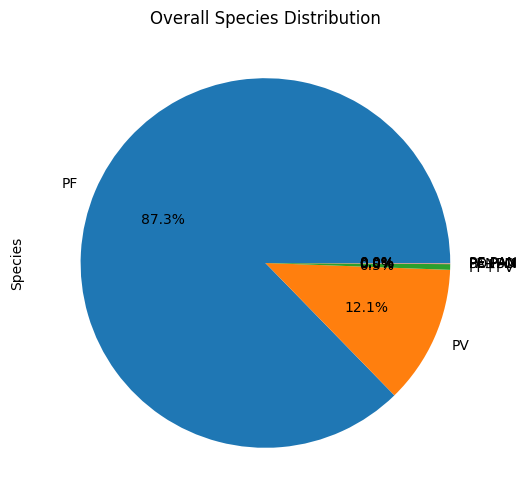

<Figure size 1200x600 with 0 Axes>

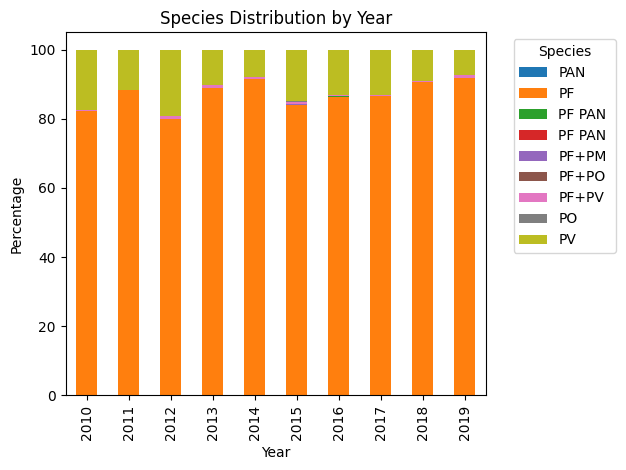

<Figure size 1200x600 with 0 Axes>

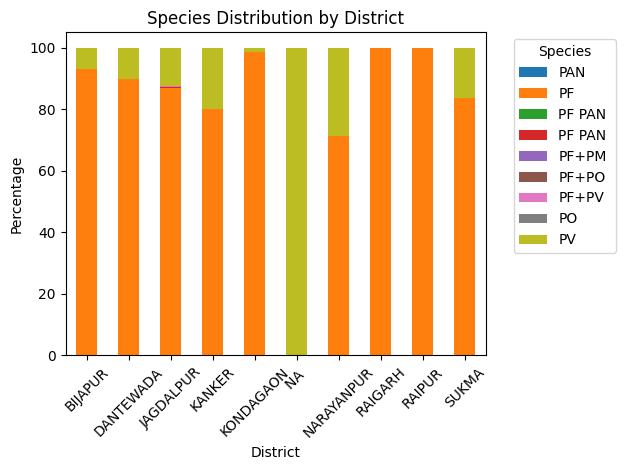


Summary Statistics:

Age Statistics:
count    7068.000000
mean       23.677632
std        15.867227
min         0.000000
25%        11.000000
50%        23.000000
75%        32.000000
max        95.000000
Name: Age (years), dtype: float64

Gender Distribution:
M    66.671372
F    33.328628
Name: Sex, dtype: float64

Top 5 Districts:
JAGDALPUR    6622
KONDAGAON     131
DANTEWADA     118
BIJAPUR        88
SUKMA          86
Name: District, dtype: int64

Species Distribution:
PF         87.295313
PV         12.111801
PF+PV       0.494071
PAN         0.028233
PF+PO       0.014116
PF PAN      0.014116
PF+PM       0.014116
PO          0.014116
PF PAN      0.014116
Name: Species, dtype: float64


In [127]:
# SPECIES DISTRIBUTION
# Overall Species Distribution
plt.figure(figsize=(10, 6))
df_positive['Species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Species Distribution')
plt.show()

# Species Distribution by Year
species_year = pd.crosstab(df_positive['Year'], df_positive['Species'], normalize='index') * 100
plt.figure(figsize=(12, 6))
species_year.plot(kind='bar', stacked=True)
plt.title('Species Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Species Distribution by District
species_district = pd.crosstab(df_positive['District'], df_positive['Species'], normalize='index') * 100
plt.figure(figsize=(12, 6))
species_district.plot(kind='bar', stacked=True)
plt.title('Species Distribution by District')
plt.xlabel('District')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print Summary Statistics
print("\nSummary Statistics:")
print("\nAge Statistics:")
print(df_positive['Age (years)'].describe())

print("\nGender Distribution:")
print(df_positive['Sex'].value_counts(normalize=True) * 100)

print("\nTop 5 Districts:")
print(df_positive['District'].value_counts().head())

print("\nSpecies Distribution:")
print(df_positive['Species'].value_counts(normalize=True) * 100)


Trend and Time-Series Analysis

C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\111217321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Datecoll'] = pd.to_datetime(df_positive['Datecoll'])
C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\111217321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Year'] = df_positive['Datecoll'].dt.year
C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\111217321.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

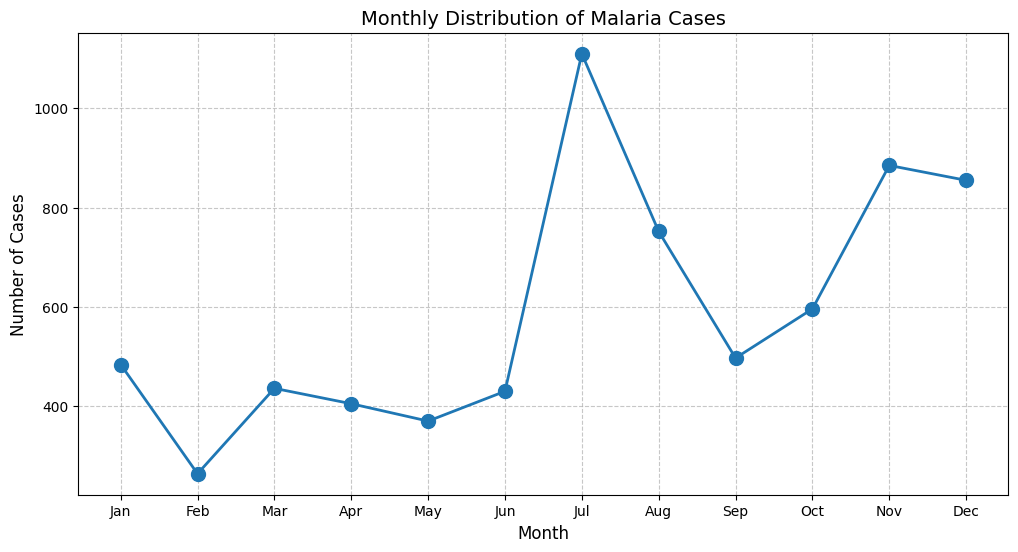


Monthly Statistics:
Month_Name
July         1110
November      885
December      855
August        752
October       596
September     497
January       484
March         436
June          430
April         405
May           370
February      264
dtype: int64


In [128]:
import calendar
from scipy import stats

# Convert date column to datetime and extract temporal components
df_positive['Datecoll'] = pd.to_datetime(df_positive['Datecoll'])
df_positive['Year'] = df_positive['Datecoll'].dt.year
df_positive['Month'] = df_positive['Datecoll'].dt.month
df_positive['Month_Name'] = df_positive['Datecoll'].dt.strftime('%B')

# Define seasons
def get_season(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [7, 8, 9, 10]:
        return 'Rainy'
    elif month in [3, 4, 5, 6]:
        return 'Summer'


df_positive['Season'] = df_positive['Month'].apply(get_season)

# Monthly Analysis
monthly_cases = df_positive['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_cases.plot(kind='line', marker='o', linewidth=2, markersize=10)
plt.title('Monthly Distribution of Malaria Cases', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(range(1,13), calendar.month_abbr[1:], rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Monthly distribution statistics
print("\nMonthly Statistics:")
monthly_stats = df_positive.groupby('Month_Name').size()
print(monthly_stats.sort_values(ascending=False))


In [129]:
# Seasonal statistics
seasonal_stats = df_positive.groupby('Season').size()
print("\nSeasonal Distribution:")
print(seasonal_stats)



Seasonal Distribution:
Season
Rainy     2955
Summer    1641
Winter    2488
dtype: int64


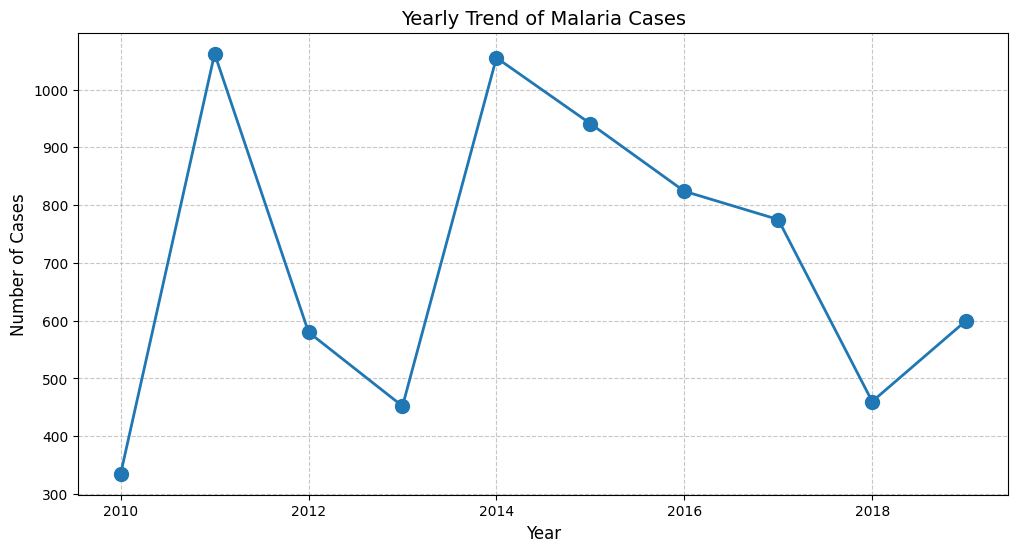


Year-over-Year Change (%):
Year
2010           NaN
2011    217.014925
2012    -45.386064
2013    -22.068966
2014    133.407080
2015    -10.805687
2016    -12.433581
2017     -5.946602
2018    -40.645161
2019     30.434783
dtype: float64


In [130]:
# Year-on-Year Analysis
yearly_cases = df_positive.groupby('Year').size()

plt.figure(figsize=(12, 6))
yearly_cases.plot(kind='line', marker='o', linewidth=2, markersize=10)
plt.title('Yearly Trend of Malaria Cases', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate year-over-year change
yoy_change = yearly_cases.pct_change() * 100
print("\nYear-over-Year Change (%):")
print(yoy_change)


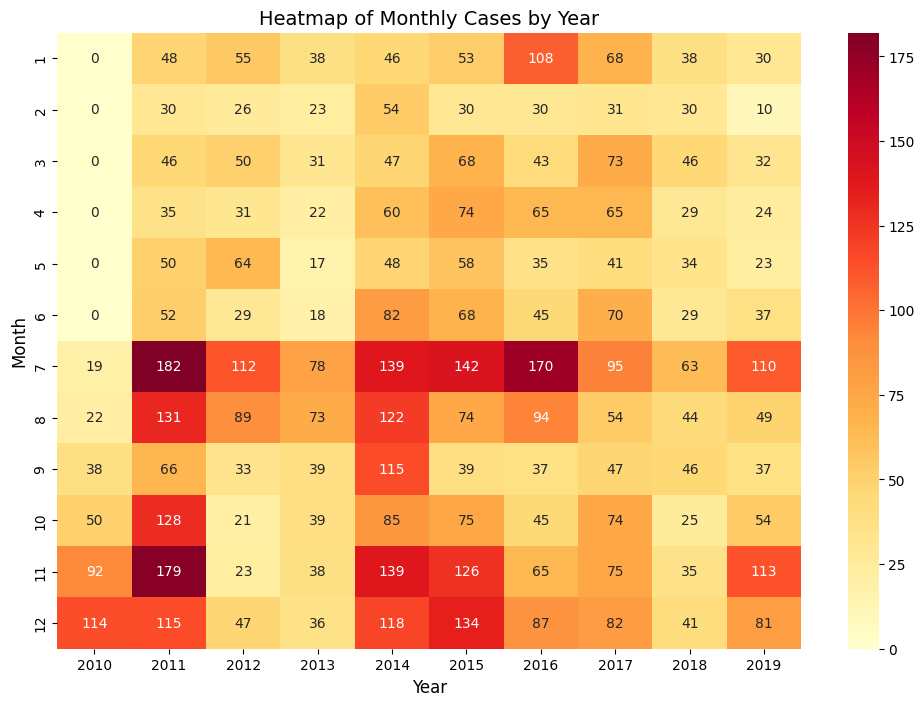

In [131]:
# Heatmap of Monthly Distribution Across Years
monthly_yearly = pd.crosstab(df_positive['Month'], df_positive['Year'])
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_yearly, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Heatmap of Monthly Cases by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()


Disease Burden Analysis

C:\Users\Pranav m\AppData\Local\Temp\ipykernel_34920\2184186571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Age_Group'] = pd.cut(df_positive['Age (years)'], bins=age_bins, labels=age_labels)


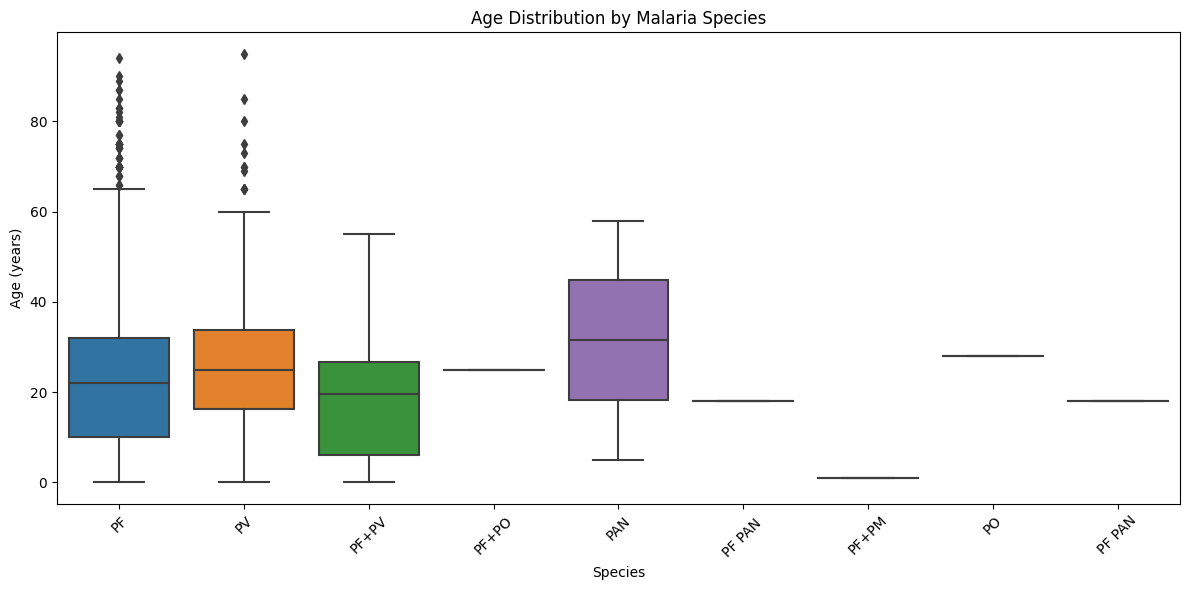

<Figure size 1200x600 with 0 Axes>

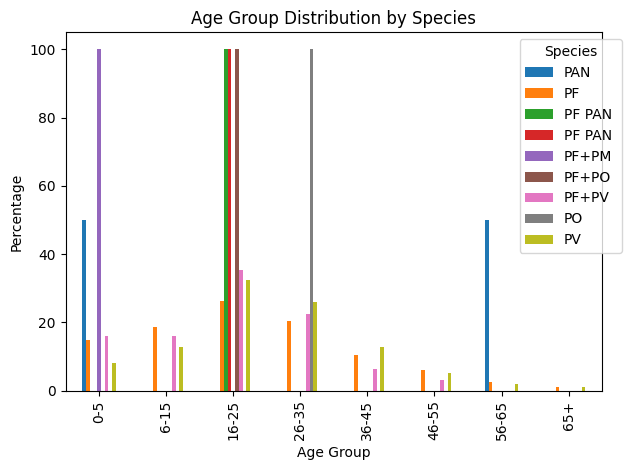

<Figure size 1000x600 with 0 Axes>

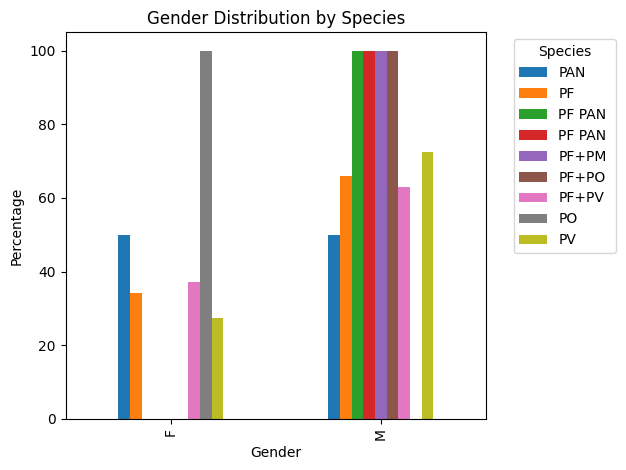

<Figure size 1500x600 with 0 Axes>

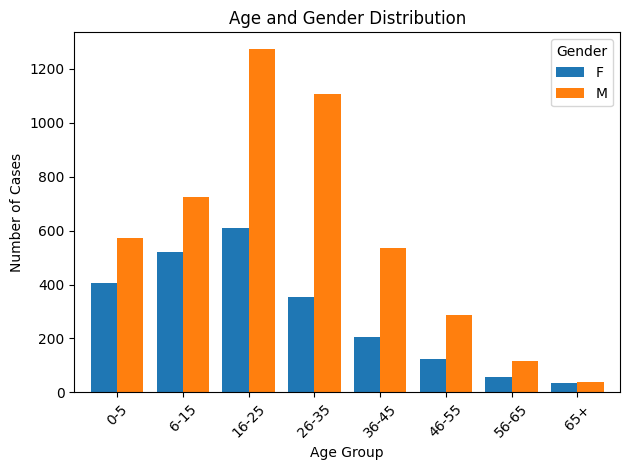

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# AGE AND SEX-STRATIFIED ANALYSIS

# Create age groups
age_bins = [0, 5, 15, 25, 35, 45, 55, 65, 100]
age_labels = ['0-5', '6-15', '16-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_positive['Age_Group'] = pd.cut(df_positive['Age (years)'], bins=age_bins, labels=age_labels)

# Age distribution by Species
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_positive, x='Species', y='Age (years)')
plt.title('Age Distribution by Malaria Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Age group distribution by Species
plt.figure(figsize=(12, 6))
species_age = pd.crosstab(df_positive['Age_Group'], df_positive['Species'], normalize='columns') * 100
species_age.plot(kind='bar', stacked=False)
plt.title('Age Group Distribution by Species')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Gender distribution by Species
plt.figure(figsize=(10, 6))
gender_species = pd.crosstab(df_positive['Sex'], df_positive['Species'], normalize='columns') * 100
gender_species.plot(kind='bar', stacked=False)
plt.title('Gender Distribution by Species')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Combined Age-Gender analysis
plt.figure(figsize=(15, 6))
age_gender_dist = pd.crosstab(df_positive['Age_Group'], df_positive['Sex'])
age_gender_dist.plot(kind='bar', width=0.8)
plt.title('Age and Gender Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



District-wise Case Distribution:
JAGDALPUR     6622
KONDAGAON      131
DANTEWADA      118
BIJAPUR         88
SUKMA           86
NARAYANPUR       7
KANKER           5
RAIPUR           4
NA               1
RAIGARH          1
Name: District, dtype: int64


<Figure size 1500x800 with 0 Axes>

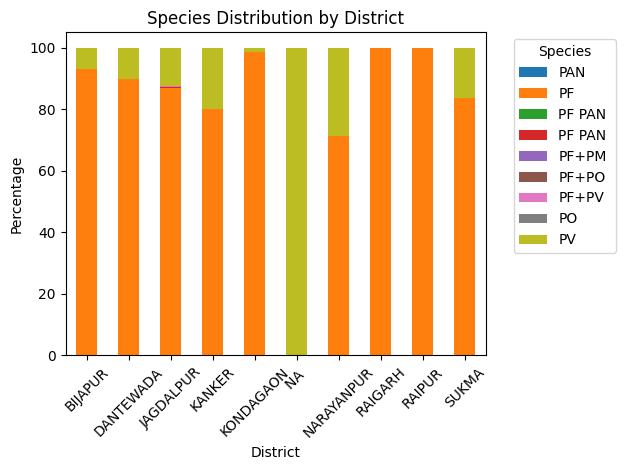

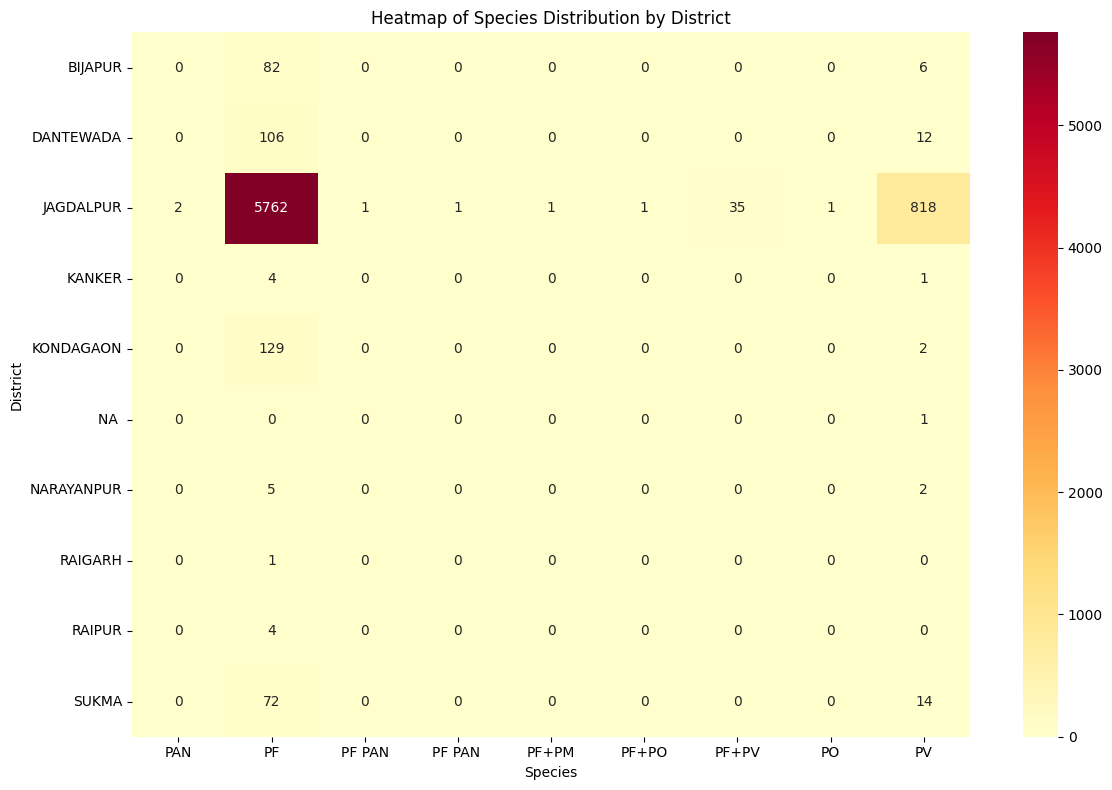


Age-Gender Summary Statistics:

Mean age by Species:
Species
PAN        31.500000
PF         23.498217
PF PAN     18.000000
PF PAN     18.000000
PF+PM       1.000000
PF+PO      25.000000
PF+PV      18.647059
PO         28.000000
PV         25.181818
Name: Age (years), dtype: float64

Gender distribution by Species (%):
Species   PAN         PF  PF PAN  PF PAN   PF+PM  PF+PO      PF+PV     PO  \
Sex                                                                         
F        50.0  34.136481     0.0      0.0    0.0    0.0  37.142857  100.0   
M        50.0  65.863519   100.0    100.0  100.0  100.0  62.857143    0.0   

Species         PV  
Sex                 
F        27.389277  
M        72.610723  

Top 5 Districts by case count:
JAGDALPUR    6622
KONDAGAON     131
DANTEWADA     118
BIJAPUR        88
SUKMA          86
Name: District, dtype: int64


In [133]:
# GEOSPATIAL DISTRIBUTION

# District-wise case counts
district_cases = df_positive['District'].value_counts()
print("\nDistrict-wise Case Distribution:")
print(district_cases)

# District-wise species distribution
plt.figure(figsize=(15, 8))
district_species = pd.crosstab(df_positive['District'], df_positive['Species'], normalize='index') * 100
district_species.plot(kind='bar', stacked=True)
plt.title('Species Distribution by District')
plt.xlabel('District')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap of district-species distribution
plt.figure(figsize=(12, 8))
district_species_counts = pd.crosstab(df_positive['District'], df_positive['Species'])
sns.heatmap(district_species_counts, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap of Species Distribution by District')
plt.xlabel('Species')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# Summary Statistics
print("\nAge-Gender Summary Statistics:")
print("\nMean age by Species:")
print(df_positive.groupby('Species')['Age (years)'].mean())

print("\nGender distribution by Species (%):")
print(gender_species)

print("\nTop 5 Districts by case count:")
print(district_cases.head())

Analysis of Stage for positive cases

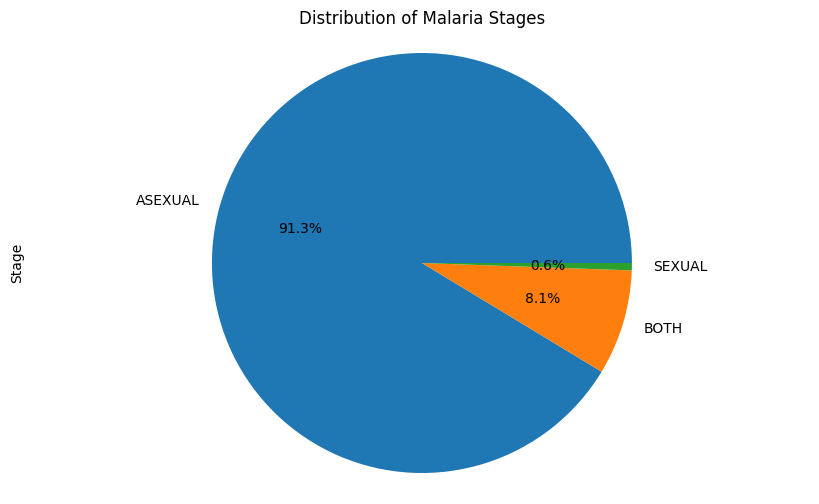


Stage Distribution:
ASEXUAL    5842
BOTH        518
SEXUAL       36
Name: Stage, dtype: int64

Stage Percentages:
ASEXUAL    91.338336
BOTH        8.098812
SEXUAL      0.562852
Name: Stage, dtype: float64


<Figure size 1200x600 with 0 Axes>

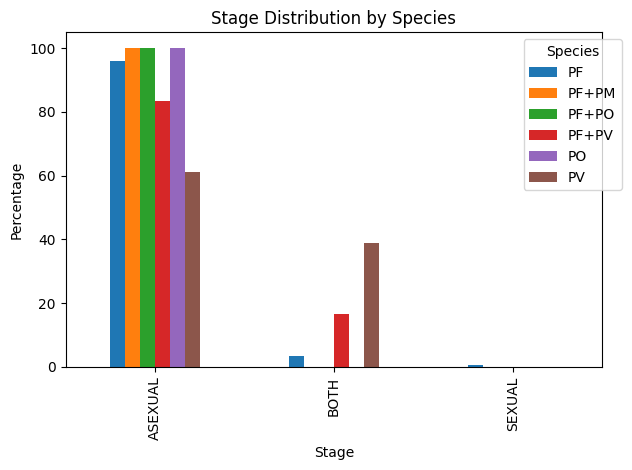

<Figure size 1200x600 with 0 Axes>

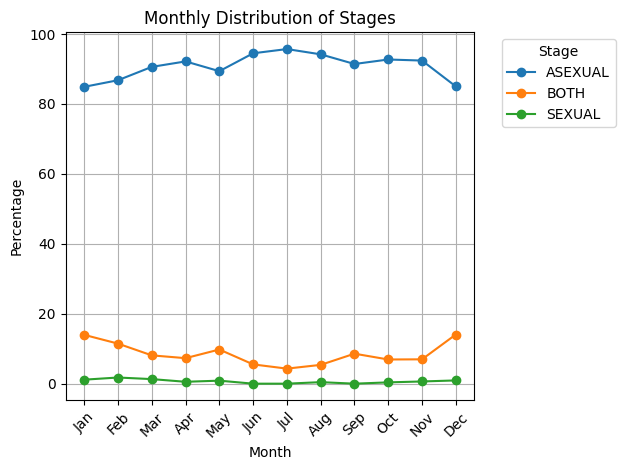

<Figure size 1200x600 with 0 Axes>

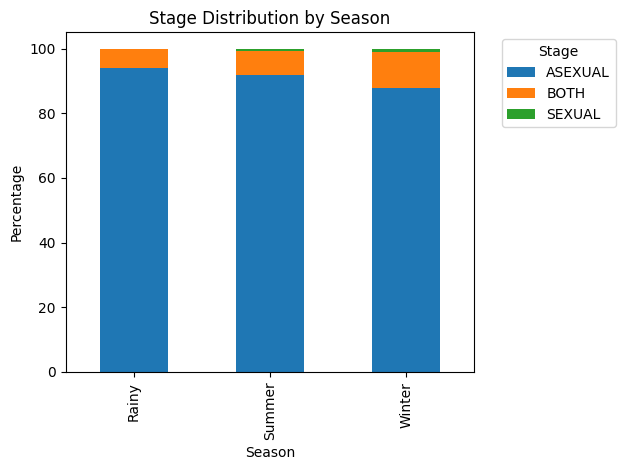


Cross-tabulation of Stage and Species:
Species    PF  PF+PM  PF+PO  PF+PV  PO   PV
Stage                                      
ASEXUAL  5308      1      1     15   1  516
BOTH      188      0      0      3   0  327
SEXUAL     36      0      0      0   0    0

Cross-tabulation of Stage and Season:
Season   Rainy  Summer  Winter
Stage                         
ASEXUAL   2527    1376    1939
BOTH       156     114     248
SEXUAL       5      10      21

Summary of Findings:
Most common Stage: ASEXUAL (91.3%)


In [134]:
# Stage Distribution
plt.figure(figsize=(10, 6))
df_positive['Stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Malaria Stages')
plt.axis('equal')
plt.show()

# Stage counts and percentages
print("\nStage Distribution:")
stage_stats = df_positive['Stage'].value_counts()
stage_percentages = df_positive['Stage'].value_counts(normalize=True) * 100
print(stage_stats)
print("\nStage Percentages:")
print(stage_percentages)

# Sage Distribution by Species
plt.figure(figsize=(12, 6))
stage_species = pd.crosstab(df_positive['Stage'], df_positive['Species'], normalize='columns') * 100
stage_species.plot(kind='bar', stacked=False)
plt.title('Stage Distribution by Species')
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Temporal Analysis of Stage
plt.figure(figsize=(12, 6))
stage_monthly = pd.crosstab(df_positive['Month'], df_positive['Stage'], normalize='index') * 100
stage_monthly.plot(kind='line', marker='o')
plt.title('Monthly Distribution of Stages')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.xticks(range(1,13), calendar.month_abbr[1:], rotation=45)
plt.grid(True)
plt.legend(title='Stage', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Stage by Season
plt.figure(figsize=(12, 6))
stage_season = pd.crosstab(df_positive['Season'], df_positive['Stage'], normalize='index') * 100
stage_season.plot(kind='bar', stacked=True)
plt.title('Stage Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Stage', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nCross-tabulation of Stage and Species:")
print(pd.crosstab(df_positive['Stage'], df_positive['Species']))

print("\nCross-tabulation of Stage and Season:")
print(pd.crosstab(df_positive['Stage'], df_positive['Season']))

print("\nSummary of Findings:")
print(f"Most common Stage: {stage_stats.index[0]} ({stage_percentages[0]:.1f}%)")

Analysis of Malaria Type (Malt_type) for positive cases

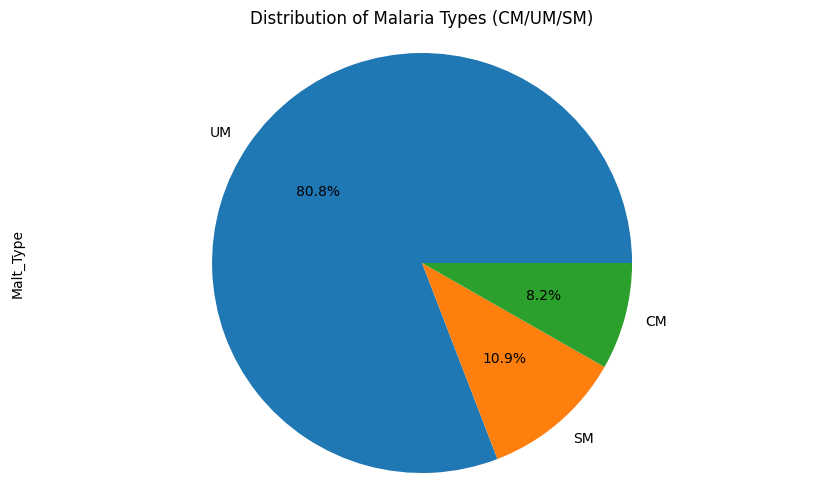


Malaria Type Distribution:
UM    5727
SM     773
CM     584
Name: Malt_Type, dtype: int64

Type Percentages:
UM    80.844156
SM    10.911914
CM     8.243930
Name: Malt_Type, dtype: float64


<Figure size 1200x600 with 0 Axes>

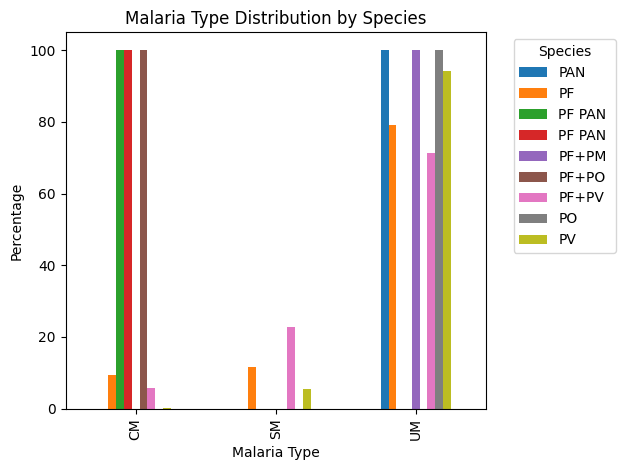

<Figure size 1200x600 with 0 Axes>

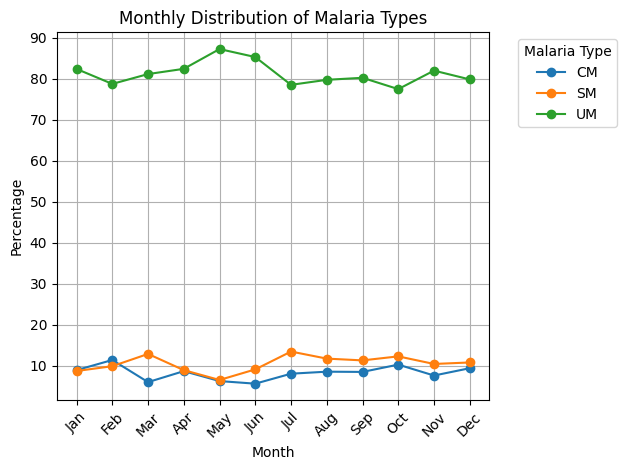

<Figure size 1200x600 with 0 Axes>

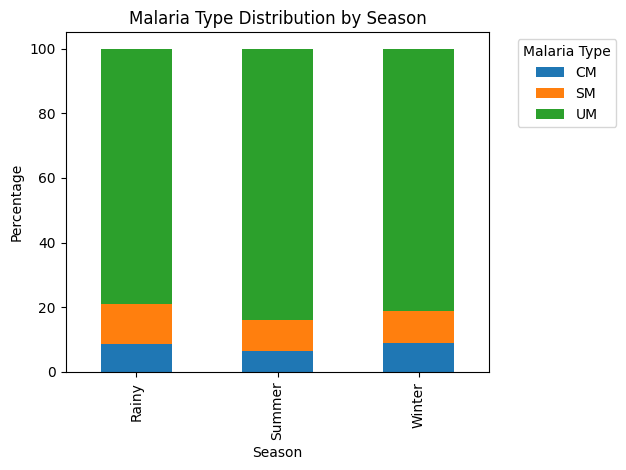


Cross-tabulation of Malt_Type and Species:
Species    PAN    PF  PF PAN  PF PAN   PF+PM  PF+PO  PF+PV  PO   PV
Malt_Type                                                          
CM           0   577       1        1      0      1      2   0    2
SM           0   718       0        0      0      0      8   0   47
UM           2  4889       0        0      1      0     25   1  809

Cross-tabulation of Malt_Type and Season:
Season     Rainy  Summer  Winter
Malt_Type                       
CM           256     108     220
SM           366     155     252
UM          2333    1378    2016


In [135]:
# Overall Malt_Type Distribution
plt.figure(figsize=(10, 6))
df_positive['Malt_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Malaria Types (CM/UM/SM)')
plt.axis('equal')
plt.show()

# Malt_Type counts and percentages
print("\nMalaria Type Distribution:")
type_stats = df_positive['Malt_Type'].value_counts()
type_percentages = df_positive['Malt_Type'].value_counts(normalize=True) * 100
print(type_stats)
print("\nType Percentages:")
print(type_percentages)

# Malt_Type Distribution by Species
plt.figure(figsize=(12, 6))
type_species = pd.crosstab(df_positive['Malt_Type'], df_positive['Species'], normalize='columns') * 100
type_species.plot(kind='bar', stacked=False)
plt.title('Malaria Type Distribution by Species')
plt.xlabel('Malaria Type')
plt.ylabel('Percentage')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Temporal Analysis of Malt_Type
plt.figure(figsize=(12, 6))
type_monthly = pd.crosstab(df_positive['Month'], df_positive['Malt_Type'], normalize='index') * 100
type_monthly.plot(kind='line', marker='o')
plt.title('Monthly Distribution of Malaria Types')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.xticks(range(1,13), calendar.month_abbr[1:], rotation=45)
plt.grid(True)
plt.legend(title='Malaria Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Malt_Type by Season
plt.figure(figsize=(12, 6))
type_season = pd.crosstab(df_positive['Season'], df_positive['Malt_Type'], normalize='index') * 100
type_season.plot(kind='bar', stacked=True)
plt.title('Malaria Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Malaria Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nCross-tabulation of Malt_Type and Species:")
print(pd.crosstab(df_positive['Malt_Type'], df_positive['Species']))

print("\nCross-tabulation of Malt_Type and Season:")
print(pd.crosstab(df_positive['Malt_Type'], df_positive['Season']))
